In [1]:
%%javascript 
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
%matplotlib inline

import pandas as pd
import ipywidgets as widgets
import numpy as np

from matplotlib import pyplot as plt
from pathlib import Path

data_path = Path('data', 'clean')

In [3]:
# loading the data
data_file = Path(data_path, 'total_public_sector_expenditure.csv')
expenditure = pd.read_csv(data_file)
expenditure

,Period,1998-99,1999-00,2000-01,2001-02,2002-03,2003-04,2004-05,2005-06,2006-07,...,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17,2017-18,2018-19
0,Scotland - £ millions,32847.0,34042.0,36004.0,38854.0,41816.0,45737.0,48808.0,51774.0,54572.0,...,63862.0,66361.0,66497.0,68086.0,67623.0,68403.0,69339.0,71432.0,73518.0,75338.0
1,Share of UK (%),9.6,9.6,9.5,9.6,9.6,9.6,9.4,9.5,9.5,...,9.2,9.3,9.3,9.3,9.2,9.1,9.2,9.3,9.2,9.3
2,Scotland - excluding North Sea (% of GDP),41.5,42.0,42.0,43.6,44.8,46.2,46.5,46.0,46.3,...,50.9,52.2,50.6,50.0,47.3,46.3,46.6,46.4,46.0,45.3
3,Scotland - including geographic share of North...,38.2,37.3,35.8,38.3,39.1,41.0,40.9,39.7,40.2,...,44.9,44.8,44.0,44.7,42.5,42.8,43.5,43.7,43.0,41.7
4,UK including all North Sea (% of GDP),34.2,34.1,34.4,35.4,36.5,37.6,38.9,38.7,38.4,...,44.9,44.7,43.5,42.8,41.2,40.5,39.6,38.8,38.4,37.9


In [4]:
# create an array with the delta value between row_index_x and row_index_y

def delta(df, row_index_x, row_index_y, label='Difference'):
    d = [label]
    for i in range(1, len(df.columns)):
        d.append(abs(df.iloc[row_index_x, i] - df.iloc[row_index_y, i]))
    
    return d

In [5]:
values = expenditure.take([0,1]).copy().reset_index(drop=True)
values

,Period,1998-99,1999-00,2000-01,2001-02,2002-03,2003-04,2004-05,2005-06,2006-07,...,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17,2017-18,2018-19
0,Scotland - £ millions,32847.0,34042.0,36004.0,38854.0,41816.0,45737.0,48808.0,51774.0,54572.0,...,63862.0,66361.0,66497.0,68086.0,67623.0,68403.0,69339.0,71432.0,73518.0,75338.0
1,Share of UK (%),9.6,9.6,9.5,9.6,9.6,9.6,9.4,9.5,9.5,...,9.2,9.3,9.3,9.3,9.2,9.1,9.2,9.3,9.2,9.3


In [42]:
values.T

,0,1
Period,Scotland - £ millions,Share of UK (%)
1998-99,32847,9.6
1999-00,34042,9.6
2000-01,36004,9.5
2001-02,38854,9.6
2002-03,41816,9.6
2003-04,45737,9.6
2004-05,48808,9.4
2005-06,51774,9.5
2006-07,54572,9.5


In [6]:
values_t = values.set_index('Period').transpose()
values_t

Period,Scotland - £ millions,Share of UK (%)
1998-99,32847.0,9.6
1999-00,34042.0,9.6
2000-01,36004.0,9.5
2001-02,38854.0,9.6
2002-03,41816.0,9.6
2003-04,45737.0,9.6
2004-05,48808.0,9.4
2005-06,51774.0,9.5
2006-07,54572.0,9.5
2007-08,58212.0,9.6


## Total Expenditure in Value (£ million)

In [19]:
values_t.columns[0]

'Scotland - £ millions'

In [40]:
values_t.rows

AttributeError: 'DataFrame' object has no attribute 'rows'

In [22]:
values_t[values_t.columns[0]].array

<PandasArray>
[32847.0, 34042.0, 36004.0, 38854.0, 41816.0, 45737.0, 48808.0, 51774.0,
 54572.0, 58212.0, 61403.0, 63862.0, 66361.0, 66497.0, 68086.0, 67623.0,
 68403.0, 69339.0, 71432.0, 73518.0, 75338.0]
Length: 21, dtype: float64

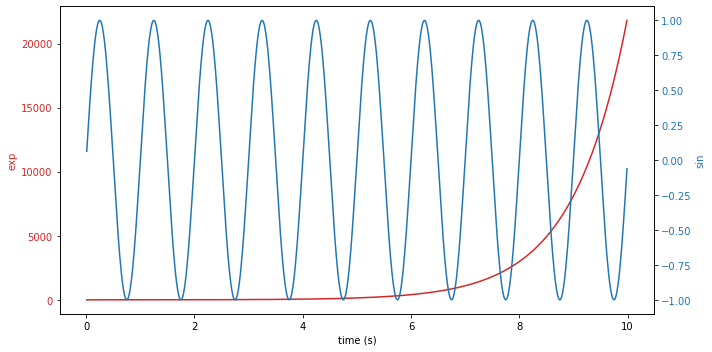

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Create some mock data
t = np.arange(0.01, 10.0, 0.01)
data1 = np.exp(t)
data2 = np.sin(2 * np.pi * t)

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('exp', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('sin', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [16]:
values_t['Scotland - £ millions'].array

<PandasArray>
[32847.0, 34042.0, 36004.0, 38854.0, 41816.0, 45737.0, 48808.0, 51774.0,
 54572.0, 58212.0, 61403.0, 63862.0, 66361.0, 66497.0, 68086.0, 67623.0,
 68403.0, 69339.0, 71432.0, 73518.0, 75338.0]
Length: 21, dtype: float64

In [9]:
np.arange(0,10,1)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [34]:
d1 = np.array(values_t[values_t.columns[0]])
d1

array([32847., 34042., 36004., 38854., 41816., 45737., 48808., 51774.,
       54572., 58212., 61403., 63862., 66361., 66497., 68086., 67623.,
       68403., 69339., 71432., 73518., 75338.])

In [39]:
t1 = np.arange(d1.min(), d1.max(), 10000)
t1

array([32847., 42847., 52847., 62847., 72847.])

ValueError: x and y must have same first dimension, but have shapes (999,) and (21,)

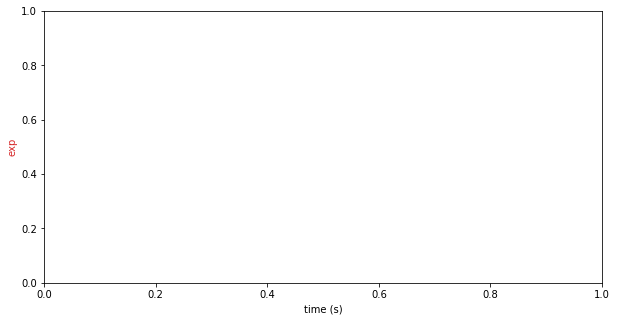

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Create some mock data
t1 = np.arange(0.01, 10.0, 0.01)
data1 = np.array(values_t[values_t.columns[0]])
# data2 = np.array(values_t[values_t.columns[1]].array)

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('exp', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

# color = 'tab:blue'
# ax2.set_ylabel('sin', color=color)  # we already handled the x-label with ax1
# ax2.plot(t, data2, color=color)
# ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

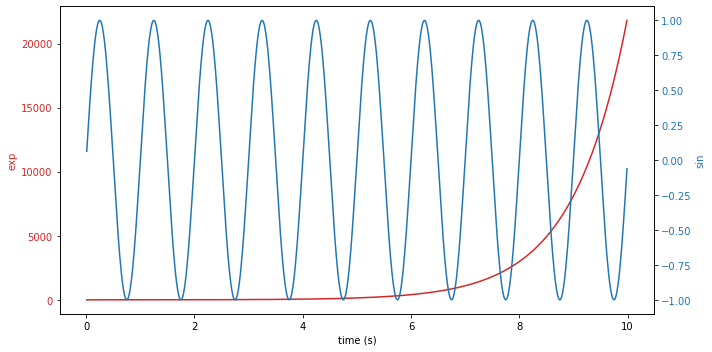

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Create some mock data
t = np.arange(0.01, 10.0, 0.01)
data1 = np.exp(t)
data2 = np.sin(2 * np.pi * t)

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('exp', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('sin', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

KeyError: 0

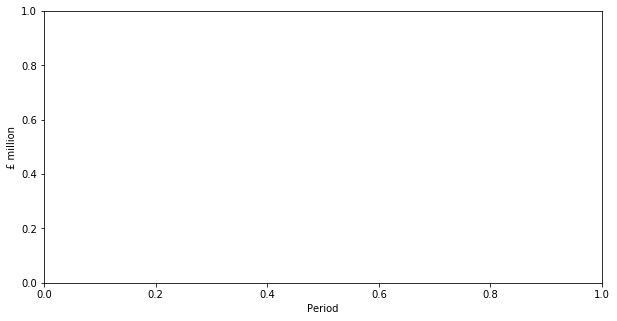

In [7]:
# Select only the revenue by values
values = expenditure.take([0,1]).copy().reset_index(drop=True)

# swaping indexes
values_t = values.set_index('Period').transpose()

plt.rcParams['figure.figsize'] = (10,5)


fig, ax1 = plt.subplots()

# f = plt.figure()

# ax1 = f.gca()

ax1.set_xlabel('Period')
ax1.set_ylabel('£ million')
ax1.plot(len(values_t), values_t[0], color=color)

ax2 = ax.twinx()
ax2.set_ylabel('Share of UK (%)')

plt.title('Total Revenue (£ million)', color='black')
values_t.plot(ax=ax1)
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

## Total Revenue in % of UK Revenue

In [ ]:
# only the revenue in Percent of the UK revenue
percent = expenditure[2:4].copy().reset_index(drop=True)

# And add a delta between them
percent.loc[len(percent.index)] = delta(percent, 0, 1, 'Difference (% UK revenue)')

# Set the index and flip the dataset
percent_t = percent.set_index('Period').transpose()

plt.rcParams['figure.figsize'] = (10,5)

f = plt.figure()
plt.title('Total Revenue (% UK Revenue)', color='black')
percent_t.plot(ax=f.gca())
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
plt.show()

## Total Revenue in % of GDP

In [ ]:
# select only the % of GDP
gdp = expenditure[4:].copy().reset_index(drop=True)

gdp_t = gdp.set_index('Period').transpose()

plt.rcParams['figure.figsize'] = (10,5)

f = plt.figure()
plt.title('Total Revenue (% GDP)', color='black')
gdp_t.plot(ax=f.gca())
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
plt.show()

### Scotland view only

In [ ]:
# select only the % of GDP
scotland_gdp = expenditure.take([4,5]).copy().reset_index(drop=True)

# Add the delta between Scotland & UK revenue with and without North Sea revenue
scotland_gdp.loc[len(scotland_gdp.index)] = delta(scotland_gdp, 0, 1, 'Difference in North Sea Revenue(% GDP)')

scotland_gdp_t = scotland_gdp.set_index('Period').transpose()

plt.rcParams['figure.figsize'] = (10,5)

f = plt.figure()
plt.title('Total Revenue (% GDP)', color='black')
scotland_gdp_t.plot(ax=f.gca())
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
plt.show()

### Scotland vs UK (Including North Sea)

In [ ]:
# select only the % of GDP
gdp_ins = expenditure.take([5,6]).copy().reset_index(drop=True)

# Add the delta between Scotland & UK revenue with and without North Sea revenue
gdp_ins.loc[len(gdp_ins.index)] = delta(gdp_ins, 0, 1, 'Difference (% GDP)')

gdp_ins_t = gdp_ins.set_index('Period').transpose()

plt.rcParams['figure.figsize'] = (10,5)

f = plt.figure()
plt.title('Total Revenue (% GDP)', color='black')
gdp_ins_t.plot(ax=f.gca())
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
plt.show()